In [1]:
import pandas as pd
import numpy as np

In [2]:
matches = pd.read_csv("C:\\Users\\Piero\\Downloads\\archive\\results.csv")

In [3]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [4]:
matches.shape

(44060, 9)

In [5]:
winner = []
for i in range (len(matches['home_team'])):
    if matches ['home_score'][i] > matches ['away_score'][i]:
        winner.append(matches['home_team'][i])
    elif matches['home_score'][i] < matches['away_score'][i]:
        winner.append(matches['away_team'][i])
    else:
        winner.append('Draw')
matches['winning_team'] = winner


matches['goal_difference'] = np.absolute(matches['home_score']-matches['away_score'])

matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


In [6]:
#aataframe francia
df = matches[(matches['home_team'] == 'France') | (matches['away_team'] == 'France')]
france = df.iloc[:]
france.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
163,1904-05-01,Belgium,France,3.0,3.0,Friendly,Brussels,Belgium,False,Draw,0.0
166,1905-02-12,France,Switzerland,1.0,0.0,Friendly,Paris,France,False,France,1.0
175,1905-05-07,Belgium,France,7.0,0.0,Friendly,Brussels,Belgium,False,Belgium,7.0
185,1906-04-22,France,Belgium,0.0,5.0,Friendly,Saint-Cloud,France,False,Belgium,5.0
200,1907-04-21,Belgium,France,1.0,2.0,Friendly,Brussels,Belgium,False,France,1.0


In [7]:
#creamos una columna para el año
year = []
for row in france['date']:
    year.append(int(row[:4]))
france['match_year'] = year
france_1930 = france[france.match_year >= 1930]
france_1930.count()

date               795
home_team          795
away_team          795
home_score         795
away_score         795
tournament         795
city               795
country            795
neutral            795
winning_team       795
goal_difference    795
match_year         795
dtype: int64

In [8]:
#cual es el resultado usual para Francia?
wins = []
for row in france_1930['winning_team']:
    if row != 'France' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)

winsdf = pd.DataFrame(wins, columns=['France_Results'])



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<AxesSubplot:xlabel='France_Results', ylabel='count'>

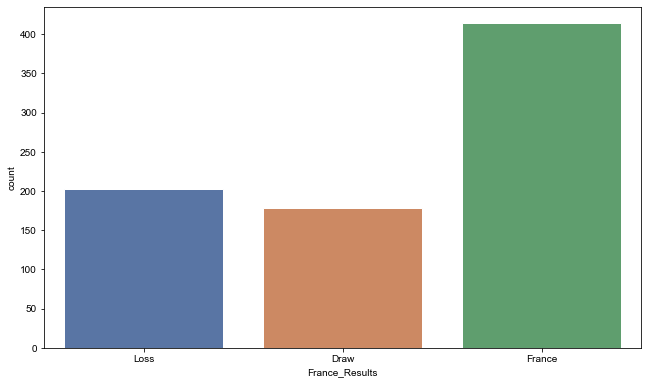

In [10]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='France_Results', data=winsdf)

In [11]:
#agregamos los países que participan en la copa del mundo 2022 qatar
worldcup_teams = ['Cameroon', 'Ghana', 'Morocco', 'Senegal', 'Tunisia', 'Iran', 'Japan', 'South Korea', 'Qatar', 'Saudi Arabia', 'Australia', 'Belgium', 'Croatia', 'Denmark', 'England', 'France', 'Germany', 'Netherlands', 'Poland', 'Portugal', 'Serbia', 'Spain', 'Switzerland', 'Wales', 'Canada', 'Mexico', 'United States', 'Costa Rica', 'Argentina', 'Brazil', 'Ecuador', 'Uruguay']

In [12]:
df_teams_home = matches[matches['home_team'].isin(worldcup_teams)]
df_teams_away = matches[matches['away_team'].isin(worldcup_teams)]

In [13]:
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               22752
home_team          22752
away_team          22752
home_score         22752
away_score         22752
tournament         22752
city               22752
country            22752
neutral            22752
winning_team       22752
goal_difference    22752
dtype: int64

In [14]:
#filtramos partidos desde 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1.0,0.0,Friendly,Barcelona,Spain,False,Spain,1.0,1930
1264,1930-01-12,Portugal,Czechoslovakia,1.0,0.0,Friendly,Lisbon,Portugal,False,Portugal,1.0,1930
1270,1930-02-23,Portugal,France,2.0,0.0,Friendly,Porto,Portugal,False,Portugal,2.0,1930
1271,1930-03-02,Germany,Italy,0.0,2.0,Friendly,Frankfurt am Main,Germany,False,Italy,2.0,1930
1273,1930-03-23,France,Switzerland,3.0,3.0,Friendly,Colombes,France,False,Draw,0.0,1930


In [15]:
#eliminamos columnas que no nos sirven
df_teams_1930 = df_teams_1930.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1263,Spain,Czechoslovakia,False,Spain
1264,Portugal,Czechoslovakia,False,Portugal
1270,Portugal,France,False,Portugal
1271,Germany,Italy,False,Italy
1273,France,Switzerland,False,Draw


In [16]:
#construcción del modelo
#la columna de predicción mostrará 2 si el equipo de casa ganó, 1 si fue empate y 0 si ganó el visitante

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team, 'winning_team'] = 2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team'] = 1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team'] = 0

df_teams_1930.head()


,home_team,away_team,neutral,winning_team
0,Spain,Czechoslovakia,False,2
1,Portugal,Czechoslovakia,False,2
2,Portugal,France,False,2
3,Germany,Italy,False,0
4,France,Switzerland,False,1


In [17]:
#convertimos los equipos de casa y visitantes de variables categoricas a inputs continuos
#obtenemos variables dummy
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [18]:
#seáramos x de ys
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

In [19]:
#separamos train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

C:\Users\Piero\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set accuracy:  0.580
Test set accuracy:  0.564


In [21]:
ranking = pd.read_csv('C:\\Users\\Piero\\Downloads\\archive\\fifa_ranking.csv')
fixtures = pd.read_csv('C:\\Users\\Piero\\Downloads\\archive\\fifa-world-cup-2022-UTC.csv')
rankings = ranking.drop_duplicates(subset='country_full',)
pred_set = []

In [22]:
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(rankings.set_index('country_full', verify_integrity= True)['rank']))

In [23]:
fixtures.insert(2, 'second position', fixtures['Away Team'].map(rankings.set_index('country_full')['rank']))

In [24]:
fixtures = fixtures.iloc[:48, :]

In [25]:
for index, row in fixtures.iterrows():
    if row['first_position'] > row['second position']:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})

pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

In [26]:
print(pred_set)

         home_team       away_team winning_team
0          Ecuador           Qatar         None
1          England            Iran         None
2      Netherlands         Senegal         None
3            Wales             USA         None
4        Argentina    Saudi Arabia         None
5          Denmark         Tunisia         None
6           Mexico          Poland         None
7           France       Australia         None
8          Morocco         Croatia         None
9          Germany           Japan         None
10           Spain      Costa Rica         None
11         Belgium          Canada         None
12     Switzerland        Cameroon         None
13         Uruguay  Korea Republic         None
14        Portugal           Ghana         None
15          Brazil          Serbia         None
16           Wales            Iran         None
17           Qatar         Senegal         None
18     Netherlands         Ecuador         None
19         England             USA      

In [27]:
pred_set_1 = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
print(pred_set_1)

   winning_team  home_team_Argentina  home_team_Belgium  home_team_Brazil  \
0          None                    0                  0                 0   
1          None                    0                  0                 0   
2          None                    0                  0                 0   
3          None                    0                  0                 0   
4          None                    1                  0                 0   
5          None                    0                  0                 0   
6          None                    0                  0                 0   
7          None                    0                  0                 0   
8          None                    0                  0                 0   
9          None                    0                  0                 0   
10         None                    0                  0                 0   
11         None                    0                  1                 0   

In [28]:
missing_cols = set(final.columns) - set(pred_set_1.columns)
for c in missing_cols:
    pred_set_1[c] = 0
pred_set_1 = pred_set_1[final.columns]

pred_set_1 = pred_set_1.drop(['winning_team'], axis=1)
pred_set_1.head()

,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#matches de grupos
predictions = logreg.predict(pred_set_1)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner:" + backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%3f'%(logreg.predict_proba(pred_set_1)[i][2]))
    print('Probability of Draw: ', '%3f'%(logreg.predict_proba(pred_set_1)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%3f'%(logreg.predict_proba(pred_set_1)[i][0]))
    print("")

Qatar and Ecuador
Winner: Ecuador
Probability of Qatar winning:  0.658856
Probability of Draw:  0.229161
Probability of Ecuador winning:  0.111982

Iran and England
Winner: England
Probability of Iran winning:  0.640297
Probability of Draw:  0.279314
Probability of England winning:  0.080389

Senegal and Netherlands
Winner: Netherlands
Probability of Senegal winning:  0.686785
Probability of Draw:  0.224563
Probability of Netherlands winning:  0.088652

USA and Wales
Winner: Wales
Probability of USA winning:  0.726346
Probability of Draw:  0.142073
Probability of Wales winning:  0.131580

Saudi Arabia and Argentina
Winner: Argentina
Probability of Saudi Arabia winning:  0.838450
Probability of Draw:  0.134551
Probability of Argentina winning:  0.026998

Tunisia and Denmark
Winner: Denmark
Probability of Tunisia winning:  0.630441
Probability of Draw:  0.248890
Probability of Denmark winning:  0.120669

Poland and Mexico
Winner: Mexico
Probability of Poland winning:  0.491182
Probabilit

In [32]:
#lista de tuplas que pasan
group_16 = [('Netherlands', 'Wales'), ('Argentina', 'Denmark'), ('France', 'Mexico'), ('England', 'Ecuador'), ('Germany', 'Croatia'), ('Brazil', 'Portugal'), ('Belgium', 'Spain'), ('Uruguay','Switzerland')]

In [35]:
def clean_and_predict(matches, ranking, final, logreg):
    positions = []
    
    for match in matches:
        positions.append(rankings.loc[rankings['country_full'] == match[0], 'rank'].iloc[0])
        positions.append(rankings.loc[rankings['country_full'] == match[1], 'rank'].iloc[0])
        
    pred_set = []
    
    i = 0
    j = 0
    
    while i < len(positions):
        dict1 = {}
        
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})
            
        pred_set.append(dict1)
        i += 2
        j += 1
        
    
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set
    
    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [36]:
clean_and_predict(group_16, ranking, final, logreg)


Wales and Netherlands
Winner: Netherlands
Probability of Wales winning:  0.683
Probability of Draw:  0.189
Probability of Netherlands winning:  0.128

Denmark and Argentina
Winner: Argentina
Probability of Denmark winning:  0.761
Probability of Draw:  0.161
Probability of Argentina winning:  0.078

Mexico and France
Winner: France
Probability of Mexico winning:  0.668
Probability of Draw:  0.191
Probability of France winning:  0.141

Ecuador and England
Winner: England
Probability of Ecuador winning:  0.774
Probability of Draw:  0.168
Probability of England winning:  0.057

Croatia and Germany
Winner: Germany
Probability of Croatia winning:  0.575
Probability of Draw:  0.237
Probability of Germany winning:  0.187

Portugal and Brazil
Winner: Brazil
Probability of Portugal winning:  0.729
Probability of Draw:  0.172
Probability of Brazil winning:  0.099

Belgium and Spain
Winner: Spain
Probability of Belgium winning:  0.650
Probability of Draw:  0.216
Probability of Spain winning:  0.13

In [37]:
#lista de cuartos de final
quarters = [('Argentina', 'Germany'), ('Netherlands', 'Brazil'), ('France', 'England'), ('Spain', 'Switzerland')]

In [38]:
clean_and_predict(quarters, ranking, final, logreg)

Argentina and Germany
Winner: Germany
Probability of Argentina winning:  0.467
Probability of Draw:  0.279
Probability of Germany winning:  0.254

Netherlands and Brazil
Winner: Brazil
Probability of Netherlands winning:  0.679
Probability of Draw:  0.176
Probability of Brazil winning:  0.145

France and England
Winner: England
Probability of France winning:  0.520
Probability of Draw:  0.253
Probability of England winning:  0.227

Spain and Switzerland
Winner: Spain
Probability of Spain winning:  0.225
Probability of Draw:  0.280
Probability of Switzerland winning:  0.495



In [40]:
#lista de semis
semi = [('Germany', 'England'), ('Brazil', 'Spain')] 

In [41]:
clean_and_predict(semi, ranking, final, logreg)


England and Germany
Winner: Germany
Probability of England winning:  0.417
Probability of Draw:  0.306
Probability of Germany winning:  0.277

Spain and Brazil
Winner: Brazil
Probability of Spain winning:  0.570
Probability of Draw:  0.272
Probability of Brazil winning:  0.158



In [42]:
# Final
finals = [('Brazil', 'Germany')]

In [43]:
clean_and_predict(finals, ranking, final, logreg)


Brazil and Germany
Winner: Germany
Probability of Brazil winning:  0.400
Probability of Draw:  0.254
Probability of Germany winning:  0.345

